In [12]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("data.csv")
print("number of the customers (total): " + str(len(data)))
print("number of normal electricity customers: " + str(np.sum(data["FLAG"]==0)))
print("number of electricity thieves: " + str(np.sum(data["FLAG"]==1)))

number of the customers (total): 42372
number of normal electricity customers: 38757
number of electricity thieves: 3615


In [14]:
# sort by date
date_dict = {}
for date in data.columns[2:]:
    date_dict[date] = pd.to_datetime(date, format = '%Y/%m/%d').strftime('%Y-%m-%d')

data_sort = data.rename(columns=date_dict)
data_sort = data_sort.T
data_sort.sort_index(inplace=True)
data_sort = data_sort.T

second_column = data_sort.pop('FLAG')
data_sort.insert(0, 'FLAG', second_column)

first_column = data_sort.pop('CONS_NO')
data_sort.insert(0, 'CONS_NO', first_column)

In [15]:
display(data_sort)

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.3,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.2,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.1,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.27,3.1,2.75,3.01,2.99,2.83,2.54,3.4,3.59,2.54
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.7,0.0,0.0,5.72,6.05,5.81,3.07,4.04,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.7,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,15.15,19.28,17.19,16.8,17.48,17.86,23.99,...,15.64,16.48,13.04,10.39,12.0,11.15,12.22,13.16,13.33,10.39


In [16]:
# remove unnecessary feature
data_sort.pop("CONS_NO")
display(data_sort)

# data cleaning using imputation method
def data_cleaning(x):
    check_null = x.isnull()
    for i in range(len(x))[1:]:
        if check_null[i]:
            if i == 1 or i == len(x)-1:
                x[i] = 0
            else:
                if check_null[i-1] or check_null[i+1]:
                    x[i] = 0
                else:
                    x[i] = (x[i-1] + x[i+1]) / 2 
    return x

data_clean = data_sort.copy(deep=True)
data_clean.apply(data_cleaning, axis=1)
display(data_clean)

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.3,7.54,9.16,6.74
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.2,13.66
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.1,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.27,3.1,2.75,3.01,2.99,2.83,2.54,3.4,3.59,2.54
42368,0,2.7,0.0,0.0,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.7,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
42370,0,16.89,15.15,19.28,17.19,16.8,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.0,11.15,12.22,13.16,13.33,10.39


,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,0,0,0,0,0,0,0,0,0,...,7.18,8.07,8.09,9.53,5.48,8.75,9.3,7.54,9.16,6.74
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.2,13.66
3,1,0,0,0,0,0,0,0,0,0,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.1,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,0,0,0,0,0,0,0,0,0,...,3.27,3.1,2.75,3.01,2.99,2.83,2.54,3.4,3.59,2.54
42368,0,2.7,0.0,0.0,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.7,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
42370,0,16.89,15.15,19.28,17.19,16.8,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.0,11.15,12.22,13.16,13.33,10.39


In [17]:
# remove outliers
def remove_outliers(x):
    mean = x[1:].mean()
    std = x[1:].std()
    for i in range(len(x))[1:]:
        if x[i] > mean + 2*std:
            x[i] = mean + 2*std

data_remove_outliers = data_clean.copy(deep=True)
data_remove_outliers.apply(remove_outliers, axis=1)
display(data_remove_outliers)

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,0,0,0,0,0,0,0,0,0,...,7.18,8.07,8.09,9.53,5.48,8.75,9.3,7.54,9.16,6.74
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,10.95,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118
3,1,0,0,0,0,0,0,0,0,0,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.1,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,0,0,0,0,0,0,0,0,0,...,3.27,3.1,2.75,3.01,2.99,2.83,2.54,3.4,3.59,2.54
42368,0,2.7,0.0,0.0,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.7,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
42370,0,16.89,15.15,19.28,17.19,16.8,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.0,11.15,12.22,13.16,13.33,10.39


In [18]:
all_zeros = 0
ones = 0
zeros = 0
drop_index = []
for i in range(len(data_remove_outliers)):
    if np.sum(data_remove_outliers.loc[i][1:])==0:
        drop_index.append(i)
        all_zeros += 1
        if data_remove_outliers.loc[i][0] == 1:
            ones += 1
        else:
            zeros += 1

data_final = data_remove_outliers.copy(deep=True)
data_final.drop(drop_index, inplace=True)
display(data_final)
print("number of the customers (total): " + str(len(data_final)))
print("number of normal electricity customers: " + str(np.sum(data_final["FLAG"]==0)))
print("number of electricity thieves: " + str(np.sum(data_final["FLAG"]==1)))

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,0,0,0,0,0,0,0,0,0,...,7.18,8.07,8.09,9.53,5.48,8.75,9.3,7.54,9.16,6.74
2,1,0,0,0,0,0,0,0,0,0,...,10.95,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118
3,1,0,0,0,0,0,0,0,0,0,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,...,14.21,10.22,8.47,6.11,6.1,6.73,7.52,10.89,9.86,8.72
5,1,0,0,0,0,0,0,0,0,0,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,0,0,0,0,0,0,0,0,0,...,3.27,3.1,2.75,3.01,2.99,2.83,2.54,3.4,3.59,2.54
42368,0,2.7,0.0,0.0,5.72,6.05,5.81,3.07,4.04,5.68,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.7,1.23,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
42370,0,16.89,15.15,19.28,17.19,16.8,17.48,17.86,23.99,12.34,...,15.64,16.48,13.04,10.39,12.0,11.15,12.22,13.16,13.33,10.39


number of the customers (total): 40258
number of normal electricity customers: 36679
number of electricity thieves: 3579


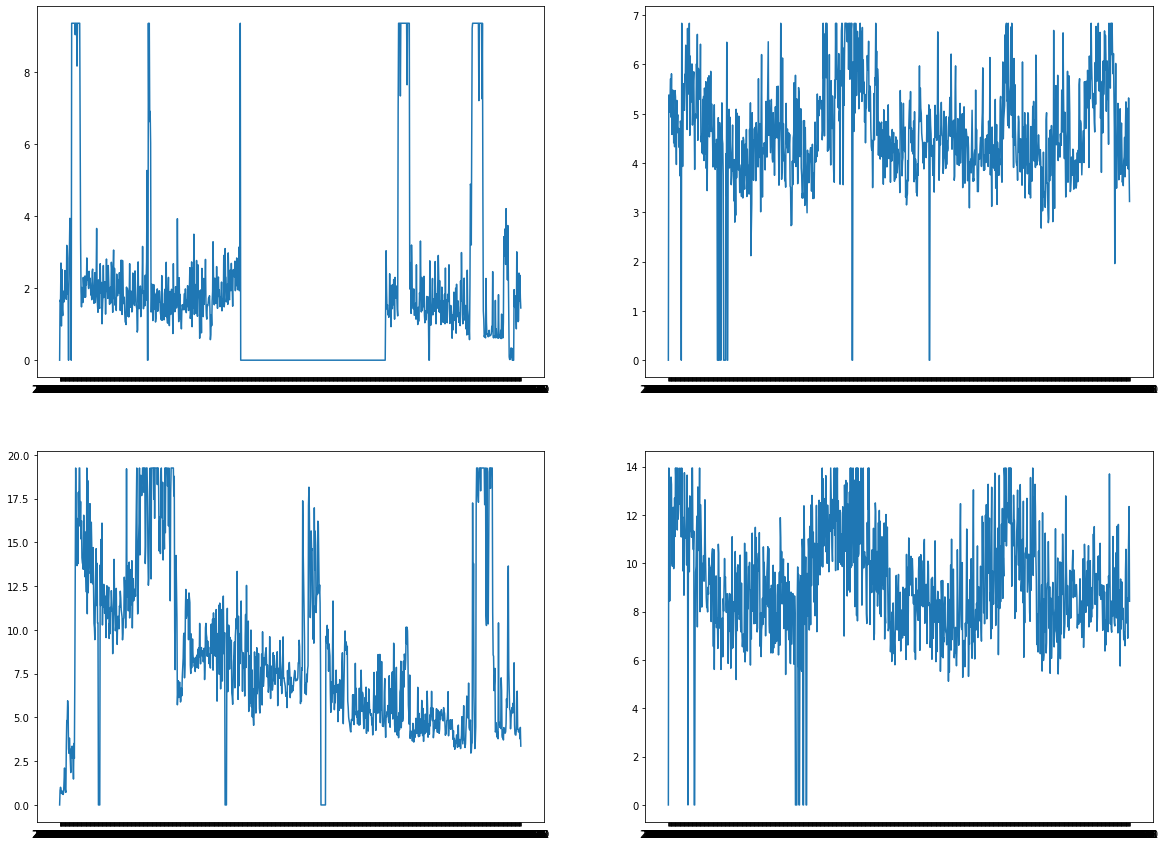

In [86]:
fig , axs = plt.subplots(2,2, figsize=(20,15))

for i in range(4):
    axs[i%2, i//2].plot(data_final.iloc[i+10000][:10000])


In [76]:
data[ data['FLAG'] == 1]

,index,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0,1,0,0,0,0,0,0,0,0,...,7.18,8.07,8.09,9.53,5.48,8.75,9.3,7.54,9.16,6.74
1,2,1,0,0,0,0,0,0,0,0,...,10.95,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118,13.462118
2,3,1,0,0,0,0,0,0,0,0,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
3,4,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.1,6.73,7.52,10.89,9.86,8.72
4,5,1,0,0,0,0,0,0,0,0,...,2.51,2.97,2.93,0.74,0.41,0.42,1.91,0.42,0.38,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,3610,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3575,3611,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0
3576,3612,1,0,0,0,0,0,0,0,0,...,17.104998,17.104998,17.104998,17.104998,17.104998,17.104998,17.104998,17.104998,17.104998,17.104998
3577,3613,1,27.39,80.88,94.42,89.45,75.71,53.74,62.4,85.5,...,309.378743,309.378743,309.378743,255.05,249.93,279.94,309.378743,309.378743,292.34,309.378743


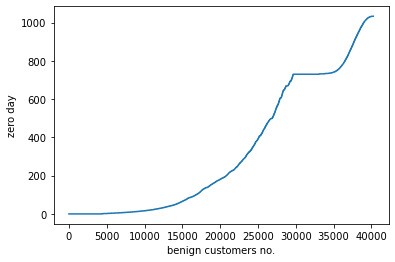

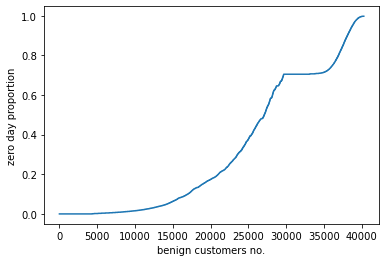

In [81]:
data = data_final.reset_index()
zero_count = np.zeros(data.shape[0])
for i in data.columns:
    if i == "FLAG":
        continue
    temp = data[i]
    for idx, val in enumerate(temp[3579:]):
        if val == 0:
            zero_count[idx] += 1
            
plt.plot(np.sort(zero_count))
plt.xlabel("benign customers no.")
plt.ylabel("zero day")
plt.show()
plt.plot(np.sort(zero_count/data.shape[1]))
plt.xlabel("benign customers no.")
plt.ylabel("zero day proportion")
plt.show()


In [68]:
fig
plt.plot(data_final.iloc[1])

FLAG                  1
2014-01-01            0
2014-01-02            0
2014-01-03            0
2014-01-04            0
                ...    
2016-10-27    13.462118
2016-10-28    13.462118
2016-10-29    13.462118
2016-10-30    13.462118
2016-10-31    13.462118
Name: 2, Length: 1035, dtype: object

In [57]:
temp.sort_values()

0             0
22979         0
22976         0
22974         0
22973         0
          ...  
99       1444.6
654      1676.0
2690     1763.6
3508     2752.0
2558     4848.0
Name: 2014-01-07, Length: 40258, dtype: object